In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('haberman.csv')

In [9]:
print(data.shape)

(305, 4)


In [10]:
print(data.columns)

Index(['30', '64', '1', '1.1'], dtype='object')


In [11]:
data.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [14]:
data.rename(columns={'30':'Age','64':'Operation_Year','1':'axil_nodes','1.1':'Status'},inplace=True)

In [15]:
data.columns

Index(['Age', 'Operation_Year', 'axil_nodes', 'Status'], dtype='object')

In [20]:
data['Status'].value_counts()

1    224
2     81
Name: Status, dtype: int64

Initial Analysis

- The data set has 305 points meaning the dataset is a small one.
- The data set has 4 columns: three columns are independent variables (Age, OperationalYear and Number of Axil Nodes) and one column is dependent variable (Status of survival, with '1' representing survival of patient for 5 or more years and '2' representing surviaval less than 5 years)
- There are two classes in total: status - '1' and status - '2'
- Patients under status - '1' category are 224 and patients under status - '2' category are 81. Thus, the dataset is an imbalanced one with status - '1' patients being almost three times more than status - '2' patients 

# Objective

Our objetive is to classify patients into status - '1' or status - '2' category based on the three features we have: Age, Operation_Year, axil_nodes

In [22]:
data.describe()

,Age,Operation_Year,axil_nodes,Status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


- The mean age is 52 and the minimum age is 30, suggesting the patients belong to the older section of the society.
- 75% patients have axil nodes as 4 and the maximum number is 52 suggesting high skewness from the mean.
- The statastical data can be visualized by box plots and violin plots.

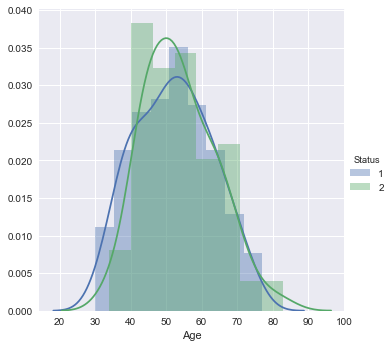

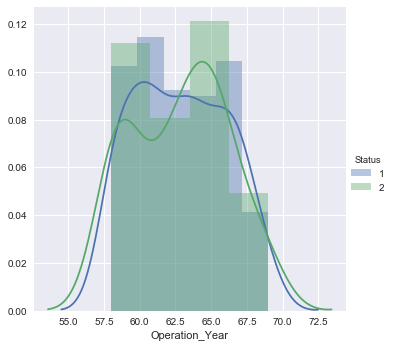

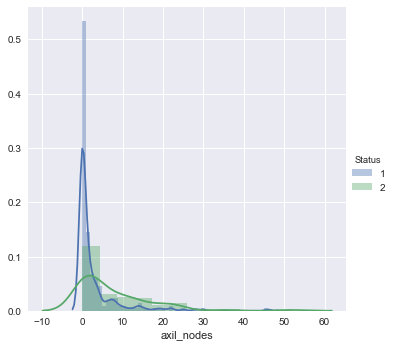

In [29]:
sns.FacetGrid(data, hue='Status', size=5) \
   .map(sns.distplot, 'Age') \
   .add_legend()
plt.show()
sns.FacetGrid(data, hue='Status', size=5) \
   .map(sns.distplot, 'Operation_Year') \
   .add_legend()
plt.show()
sns.FacetGrid(data, hue='Status', size=5) \
   .map(sns.distplot, 'axil_nodes') \
   .add_legend()
plt.show()


# Observations

-The histograms suggest that none of the features alone would be able to differentiate status - '1' from status - '2' as there is quite a significant overlapping among both the status cases in all the three features.
- The histograms follow the bell curve in case of Age and curve in the case for operation year can also be included as a bell curve.
- However, the curve in the case of axil nodes is skewed towards right.
- In axil_nodes curve we can see that the density of status - '1' is quite high when the number of axil nodes are 0. Almost all the cases of status '1' are observed when the number of axil nodes are close to the 0 mark.
- Furthermore, we can not use this as a deciding factor because status '2' cases are also quite dense when axil nodes are 0.

#we will focus majorly on axil_nodes feature as it is the only promising feature when observed alone.
#Before moving onto box plots and violin plots we should also have a quick look at CDF just to be sure not to miss anything.

In [31]:
data_st1 = data[data['Status'] == 1]
data_st2 = data[data['Status'] == 2]
print(data_st1.shape)
print(data_st2.shape)

(224, 4)
(81, 4)


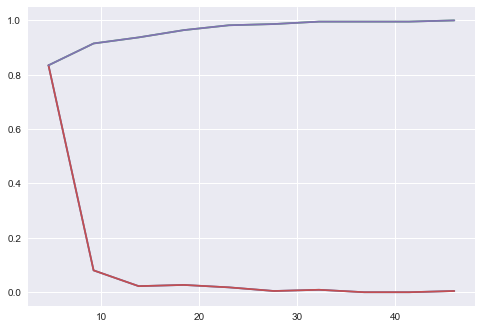

In [33]:
counts, bin_edges = np.histogram(data_st1['axil_nodes'], bins=10, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

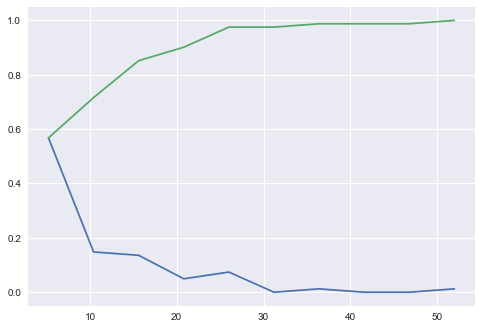

In [34]:
counts, bin_edges = np.histogram(data_st2['axil_nodes'], bins=10, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

#cdf also confirms that about 80-85% of the status '1' cases are observed when the number of axil nodes are less than 10
#cdf of status '2' suggests that about 60% of patients with status - '2' are having axil nodes less than 10.

THEREFORE, cdf also doesn't help us a lot to fulfill our objective.

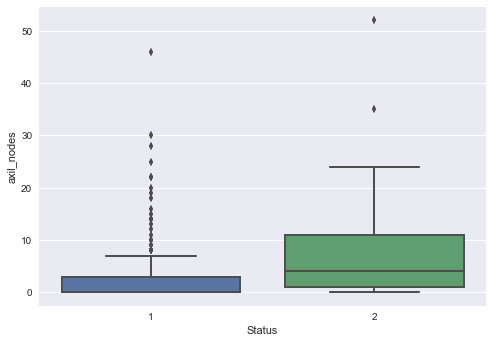

In [38]:
sns.boxplot(x='Status', y='axil_nodes', data=data)
plt.show()

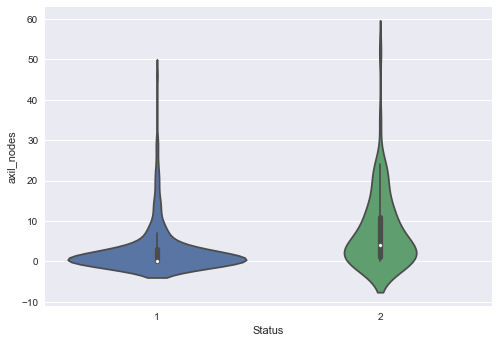

In [44]:
sns.violinplot(x='Status', y='axil_nodes', data=data)
plt.show()

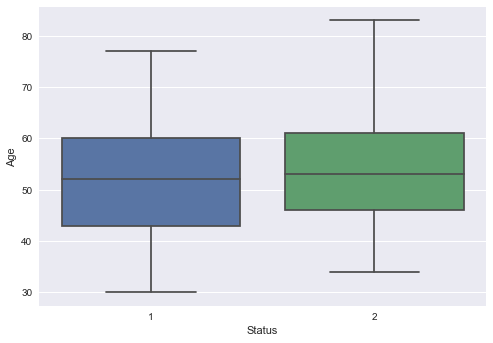

In [40]:
sns.boxplot(x='Status', y='Age', data=data)
plt.show()

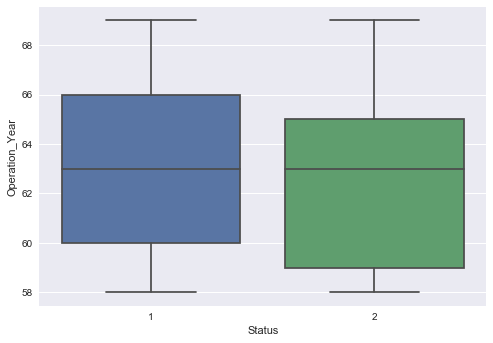

In [43]:
sns.boxplot(x='Status', y='Operation_Year', data=data)
plt.show()

# Observations
- No variable alone is capable of solving our objective.
- Some useful insights are obtained from box and violin plots for the case of axil_nodes but nothing primarily solves our purpsoe.
- Box plot confirms the skewness in the status points and also confirms that about 85% of the status - '1' are below 10 axil nodes mark.
- Violin plot also justifies our point made during the analysis of pdf and cdf.
- It is now time to move to bivariate data analyis to find something substantial

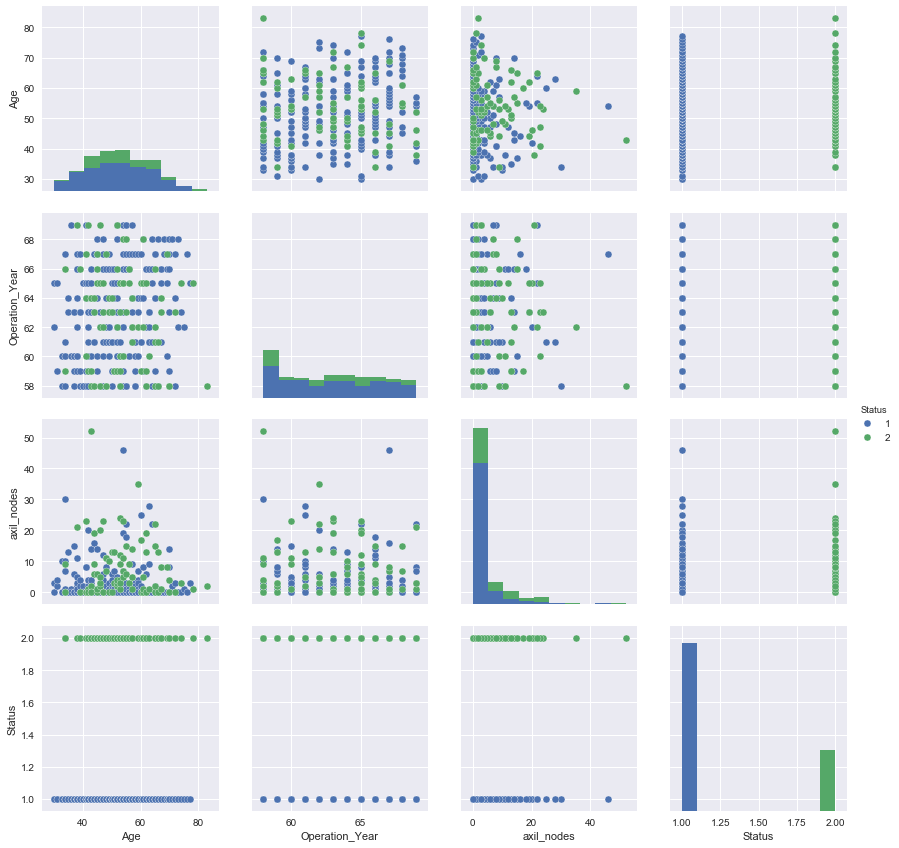

In [46]:
sns.pairplot(data=data, hue='Status', size=3)
plt.show()

# Observation

- There is no clear indicator for separating status - '1' and status - '2' when taking any set of two variables together.
- However, the best scatter plot for solving our objective seems to be the axil_nodes vs Operation_Year.
- As we suspected, the axil_nodes feature is a major attribute for solving this scenario.
- To get clear if-else statements for solving the objective we may need more features.
- 3d plot may shed some more light but it seems unlikely from initial analysis.